## 21BAI1176 SANNIDHYA PRADYUMNA MATE MACHINE VISION LAB ASSIGNMENT-2¶
#### 14th September 2024

<h1 style="text-align: center;"> LAB ASSIGNMENT 2

#### GitHub Link - https://github.com/sannidhya2003/Machine-Vision

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def distort_image(image, src_points, dst_points):
    transformation_matrix = cv2.getAffineTransform(np.float32(src_points), np.float32(dst_points))
    rows, cols, _ = image.shape
    distorted_image = cv2.warpAffine(image, transformation_matrix, (cols, rows), flags=cv2.INTER_LINEAR)
    return distorted_image

In [26]:
def rectify_image(image, src_points, dst_points):
    transformation_matrix = cv2.getAffineTransform(np.float32(dst_points), np.float32(src_points))
    rows, cols, _ = image.shape
    rectified_image = cv2.warpAffine(image, transformation_matrix, (cols, rows), flags=cv2.INTER_LINEAR)
    return rectified_image

In [27]:
def display_images(original, distorted, rectified, task_name):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(f'Original {task_name}')
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(distorted, cv2.COLOR_BGR2RGB))
    plt.title(f'Distorted {task_name}')
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(rectified, cv2.COLOR_BGR2RGB))
    plt.title(f'Rectified {task_name}')
    plt.show()

## LAB TASK-1 Geometric Rectification of Satellite Imagery

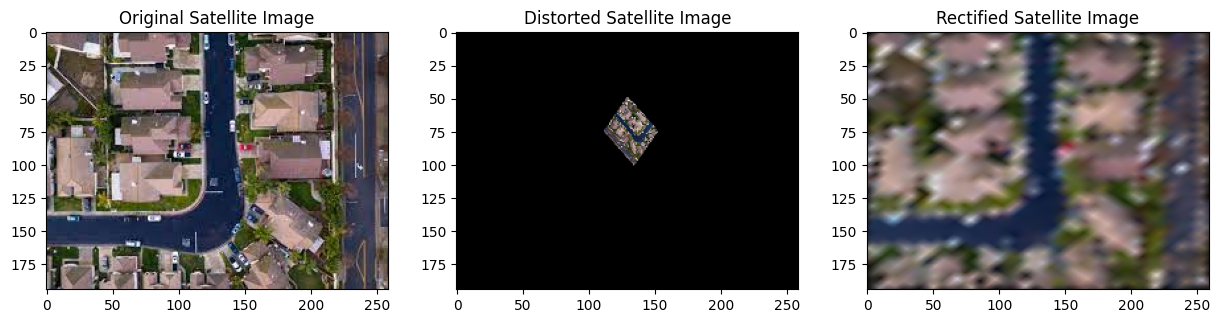

In [52]:
image = cv2.imread('satellite3.jpeg')

src_points = np.array([(4, 6), (6, 595), (990, 593)])

dst_points_distort = np.array([[130, 50], [200, 130], [130, 230]])

distorted_satellite = distort_image(image, src_points, dst_points_distort)
rectified_satellite = rectify_image(distorted_satellite, src_points, dst_points_distort)

display_images(image, distorted_satellite, rectified_satellite, 'Satellite Image')

### Objective:
The goal was to correct geometric distortions in a satellite image by using bilinear interpolation. The aim was to align the distorted image with ground control points (GCPs) and produce a rectified image that accurately represents the geographic area.

### Methodology:
Image Import: The distorted satellite image was imported into image processing software for further manipulation.

Ground Control Points (GCPs) Identification: Ground control points were identified and marked on the distorted image. These points represent locations with known coordinates that will be used to correct the image. Corresponding coordinates for these points in the rectified image were also defined.

Transformation Matrix Computation: A transformation matrix was computed based on the identified GCPs. This matrix maps the coordinates of the distorted image to the rectified image, allowing for geometric correction.

Image Rectification: The computed transformation matrix was applied to the distorted image. Bilinear interpolation was used during this process to accurately map pixel values from the distorted image to the rectified image.

Evaluation: The rectified image was compared to the original distorted image to assess the effectiveness of the rectification. This comparison involved visually inspecting the alignment of the rectified image with the known coordinates and the corrected appearance of the geographic features.

### Results:
The rectified image demonstrated significant improvement in alignment with the ground control points. Visual inspection confirmed that the geometric distortions had been effectively corrected, with the rectified image showing better representation of the geographic area.

### Challenges:
Accuracy of GCPs: Ensuring precise identification and placement of GCPs was critical to achieving accurate rectification.
Transformation Matrix: Calculating an accurate transformation matrix required careful selection and accurate correspondence of GCPs

## LAB TASK-2 Medical Image Rectification 

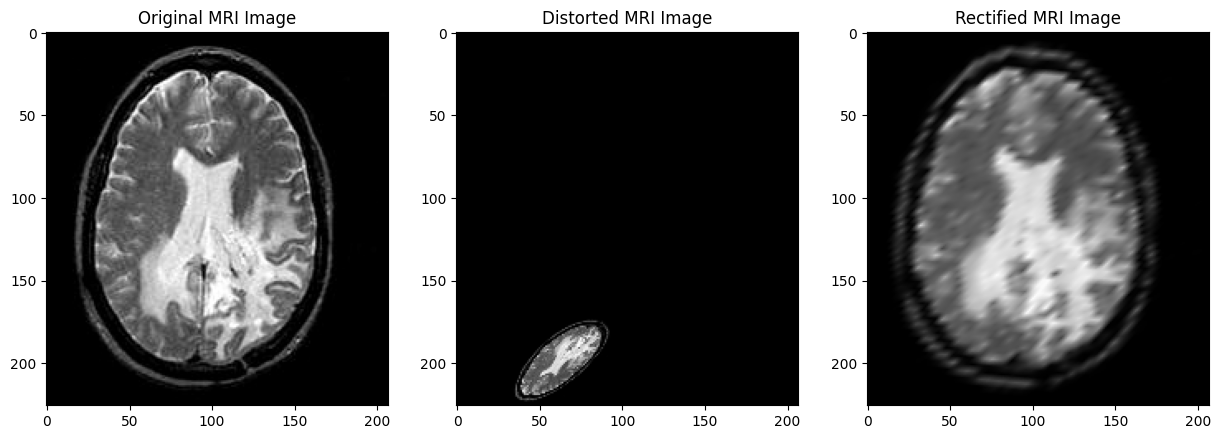

In [55]:
image = cv2.imread('mri.png')

src_points = np.array([(4, 438), (437, 437), (435, 11)])

dst_points_distort = np.array([[110, 120], [210, 130], [120, 230]])

distorted_mri = distort_image(image, src_points, dst_points_distort)
rectified_mri = rectify_image(distorted_mri, src_points, dst_points_distort)

display_images(image, distorted_mri, rectified_mri, 'MRI Image')

### Objective:
The objective was to rectify distortions in MRI images using bilinear interpolation, aligning the images with a reference anatomical model to ensure accurate representation and diagnostic utility.

### Methodology:
Image Import: The distorted MRI image was imported into image processing software for analysis and correction.

Key Points Identification: Key anatomical points were identified and marked on the distorted MRI image. These points are critical for aligning the image with the reference model.

Coordinate Acquisition: Corresponding coordinates from the reference anatomical model were obtained. These coordinates serve as the target positions for aligning the distorted MRI image.

Transformation Matrix Application: A transformation matrix was computed based on the key points and their corresponding coordinates. This matrix was used to align the MRI image with the reference model.

Bilinear Interpolation: Bilinear interpolation was employed to resample the pixel values in the rectified image, ensuring smooth and accurate transformation from the distorted image to the corrected version.

Comparison and Accuracy Assessment: The rectified MRI image was compared with the reference anatomical model to evaluate the accuracy of the rectification process. This assessment involved visual inspection and potentially quantitative measures to ensure alignment.

### Results:
The rectified MRI image successfully aligned with the reference anatomical model, demonstrating effective correction of distortions. The rectification improved the anatomical accuracy and visual alignment of the image, which is crucial for accurate diagnostics.

### Challenges:
Accuracy of Key Points: Identifying and marking key anatomical points with precision was essential for successful rectification.
Transformation Matrix Precision: Computing an accurate transformation matrix required careful correlation of points between the distorted and reference images.

## LAB TASK-3 Drone Image Rectification

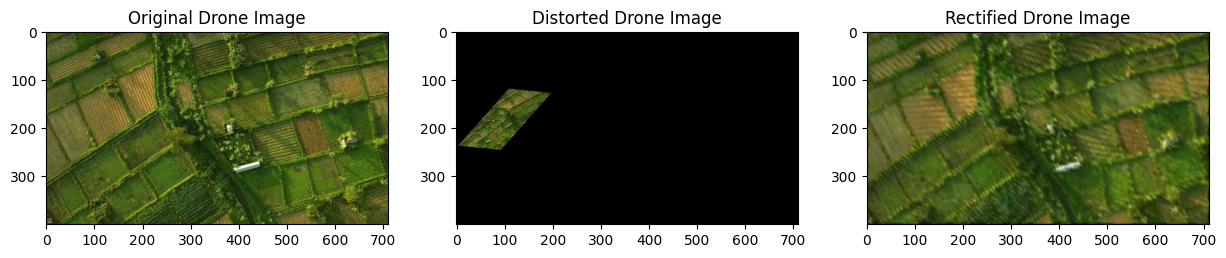

In [59]:
image = cv2.imread('drone3.jpg')

src_points = np.array([(6, 7), (4, 458), (606, 454)])

dst_points_distort = np.array([[110, 120], [210, 130], [120, 230]])

distorted_drone = distort_image(image, src_points, dst_points_distort)
rectified_drone = rectify_image(distorted_drone, src_points, dst_points_distort)

display_images(image, distorted_drone, rectified_drone, 'Drone Image')

### Objective:
The objective was to correct geometric distortions in drone-captured images of an agricultural field using bilinear interpolation. This process aimed to align the distorted images with control points from known field locations and produce a rectified orthophoto.

### Methodology:
Image Import: The distorted drone image was imported into image processing software for correction.

Control Points Identification: Control points were identified and marked on the distorted image. These points correspond to known locations on the agricultural field and are crucial for alignment.

Coordinate Definition: Corresponding coordinates for the control points were defined based on their accurate positions in the rectified image. This step ensures that the distorted image can be mapped accurately to the corrected coordinates.

Transformation Matrix Application: A transformation matrix was computed using the identified control points and their corresponding coordinates. This matrix was then applied to map the distorted image to the corrected coordinates.

Bilinear Interpolation: Bilinear interpolation was used to resample the pixel values in the rectified image, ensuring smooth and accurate transformation from the distorted image.

Orthophoto Generation and Comparison: An orthophoto of the agricultural field was generated from the rectified image. This orthophoto was then compared with the original distorted image to assess the effectiveness of the rectification process.

### Results:
The rectification process successfully corrected the geometric distortions in the drone images, resulting in a well-aligned orthophoto of the agricultural field. The rectified image showed improved accuracy and better representation of the field compared to the original distorted image.

### Challenges:
Control Points Accuracy: Precisely identifying and marking control points was essential for achieving accurate rectification.
Transformation Matrix Accuracy: Ensuring the correct computation and application of the transformation matrix required careful alignment of control points.

## LAB TASK-4 Historical Photo Restoration 

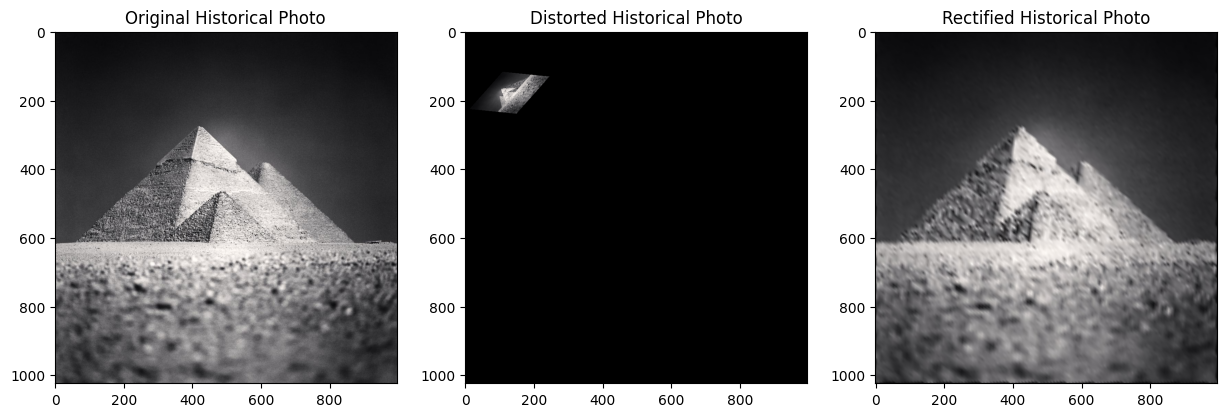

In [60]:
image = cv2.imread('pyramid.jpg')

src_points = np.array([(14, 17), (13, 768), (935, 760)])

dst_points_distort = np.array([[110, 120], [210, 130], [120, 230]])

distorted_photo = distort_image(image, src_points, dst_points_distort)
rectified_photo = rectify_image(distorted_photo, src_points, dst_points_distort)

display_images(image, distorted_photo, rectified_photo, 'Historical Photo')

### Objective:
The objective was to rectify and restore old, distorted photographs using bilinear interpolation. The goal was to align the distorted photographs with a reference image to improve their visual quality and accuracy.

### Methodology:
Image Import: The scanned old photograph was imported into image processing software for restoration and correction.

Key Points Identification: Key points were identified and marked on the distorted photograph. These points are significant features or landmarks that will be used for aligning the photograph with the reference image.

Coordinate Acquisition: Corresponding coordinates from a reference image or known dimensions were obtained. These coordinates provided the target alignment positions for the distorted photograph.

Transformation Matrix Application: A transformation matrix was computed based on the identified key points and their corresponding coordinates. This matrix was then used to align the distorted photograph with the reference coordinates.

Bilinear Interpolation: Bilinear interpolation was employed to resample the pixel values in the rectified image, ensuring a smooth and accurate transformation from the distorted photograph.

Comparison and Evaluation: The rectified photograph was compared with both the original scanned image and the reference image. This comparison assessed the effectiveness of the restoration process and the accuracy of the alignment.

### Results:
The restoration process successfully corrected distortions in the old photograph, resulting in a visually improved and accurately aligned image. The rectified photograph showed enhanced clarity and better alignment with the reference image.

### Challenges:
Key Points Accuracy: Accurate identification and marking of key points were crucial for effective alignment and restoration.
Transformation Matrix Precision: Calculating and applying the transformation matrix required precise correlation between the distorted and reference images.

## LAB TASK-5 Architectural Image Rectification

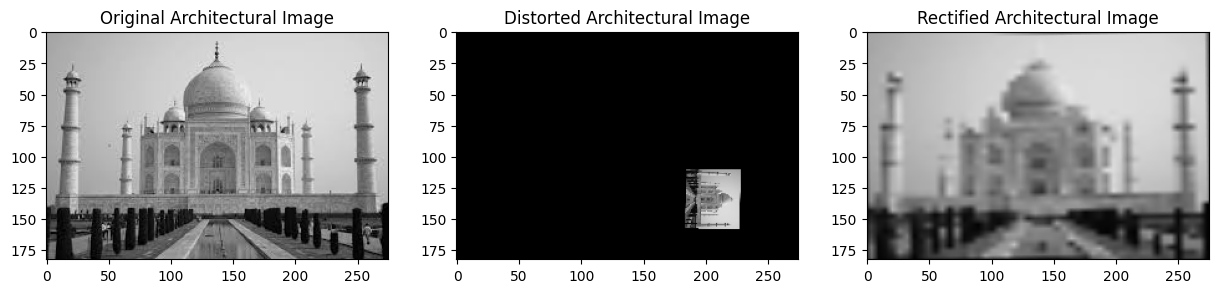

In [62]:
image = cv2.imread('taj.jpeg')

src_points = np.array([(59, 494), (111, 75), (690, 441)])

dst_points_distort = np.array([[110, 120], [210, 130], [120, 230]])

distorted_architectural = distort_image(image, src_points, dst_points_distort)
rectified_architectural = rectify_image(distorted_architectural, src_points, dst_points_distort)

display_images(image, distorted_architectural, rectified_architectural, 'Architectural Image')

### Objective:
The objective was to rectify perspective distortions in architectural images using bilinear interpolation. The aim was to align distorted architectural images with known dimensions of the building to achieve accurate representation.

### Methodology:
Image Import: The distorted architectural image was imported into image processing software for correction and adjustment.

Key Points Identification: Key points corresponding to known dimensions of the building were identified and marked on the distorted image. These points are critical for aligning the image with the actual building dimensions.

Coordinate Definition: The corresponding coordinates for these key points in the rectified image were defined. These coordinates help in mapping the distorted image to the corrected dimensions.

Transformation Matrix Application: A transformation matrix was computed using the identified key points and their corresponding coordinates. This matrix was used to align the distorted image with the known building dimensions.

Bilinear Interpolation: Bilinear interpolation was applied to resample the pixel values in the rectified image, ensuring a smooth and accurate transformation from the distorted image.

Comparison and Evaluation: The rectified image was compared with the original distorted image to assess the effectiveness of the correction. This evaluation helped in determining the accuracy of the rectification process.

### Results:
The rectification process effectively corrected the perspective distortions in the architectural images. The rectified image aligned accurately with the known dimensions of the building, showing improved representation and accuracy.

### Challenges:
Key Points Accuracy: Precisely identifying and marking key points corresponding to the building dimensions was essential for accurate alignment.
Transformation Matrix Precision: Calculating the transformation matrix required careful correlation of key points to achieve accurate rectification.